In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import umap
import matplotlib.pyplot as plt

In [3]:
url = "https://storage.googleapis.com/superlinked-notebook-user-acquisiton-analytics/user_acquisiton_data.csv"
data = pd.read_csv(url)

In [4]:
#convert datetime
data['signup_date'] = pd.to_datetime(data['signup_date'], unit='s')

In [5]:
#vectorizing text
model = SentenceTransformer('all-MiniLM-L6-v2') 
text_embeddings = model.encode(data['ad_creative'].tolist())

In [6]:
np.isnan(text_embeddings).any()

False

In [7]:
#clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(text_embeddings)
data['cluster'] = clusters

In [8]:
#dimension reduction
reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(text_embeddings)

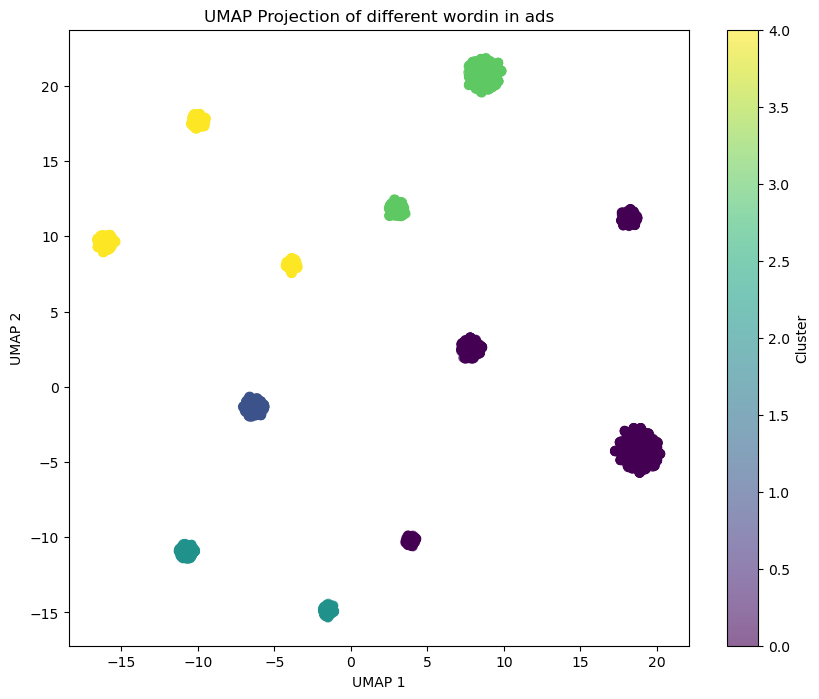

In [9]:
#vis
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.title('UMAP Projection of different wordin in ads')
plt.colorbar(label='Cluster')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()